In [15]:
from IPython.core.display import display, HTML, Markdown
import copy
import numpy as np
import matplotlib.pyplot as plt
from networkx import nx

n = 20
# segue una lista di precedenze della forma [u,v], cl significato che u deve essere schedulato oprima di v.
prec_original_instance = [
       [7,4],
       [0, 1],   # l'attività 0 deve essere schedulata prima dell'attività 1
       [0, 4],
       [0, 7],
       [0, 15],
       [0, 18],
       [1, 1],
       [1, 4],
       [1, 7],
       [1, 15],
       [1, 18],
       [18,0],
]

In [10]:

def visualizza_e_valuta_le_precedenze_non_rispettate(soluzione_problem_solver,silent=False):
    #controllo sulla lunghezza della lista fornita
    if(len(soluzione_problem_solver)!=n):
        #modifcare l'output, dire di che lunghezza voglio la lista e di che lunghezza l'ha data lui
        if(silent):
            return 0
        else:
            return "hai fornito una soluzione di lungezza "+len(soluzione_problem_solver) + ", \
                    dovresti fornirla di lunghezza "+n
    
    check=np.zeros(len(soluzione_problem_solver))
    #incremento la posizione soluzione_problem_solver[i] di uno , se sono inseriti tutti correttamente avrò
    #un array di soli 1
    for i in range(len(soluzione_problem_solver)):
        try:
            check[soluzione_problem_solver[i]]=check[soluzione_problem_solver[i]]+1
        except:
            if(silent):
                return 0
            else:
                return "hai inserito l'attività "+soluzione_problem_solver[i]+", ti ricordo che le attività \
                        vanno da 0 a " + n-1 
                    
    
    contatore_errori=0
    
    #la lista contiene una e una volta sola tutti gli elementi
    if(np.all((check == 1))):
        for element in prec_original_instance:
            indice1=soluzione_problem_solver.index(element[0])
            indice2=soluzione_problem_solver.index(element[1])
            if(indice1>indice2):
                contatore_errori=contatore_errori+1
        if(contatore_errori==0):
            if(silent):
                return 1
            else:
                return "hai rispettato tutte le precedenze"
        else:
            if(silent):
                return 0
            else:
                return "non hai rispettato "+str(contatore_errori)+" precedenze "
        
    #manca un elemento e/o un elemento viene ripetuto più di una volta
    else:
        if(silent):
            return 0
        else:
            return "l'array NON contiene tutte le attività"
    
    

def visualizza(ordinamento):
    G = nx.DiGraph()
    # mathplotlib o networkx o ?
    # visualizziammo il grafo coi nodi sulla linea nelle posizioni specificate da ordinamento e gli archi che fanno panza per poterli vedere
    # il problem-solver deve rendersi conto di quali archi sono rivolti all'indietro.
    #for i in range(len(ordinamento)-1):
    #    G.add_edge(ordinamento[i],ordinamento[i+1])
    G.add_edges_from(ordinamento)
    nx.draw_planar(G,with_labels=True,arrows=True)
    plt.plot()
    
def ciclo_di_precedenze(soluzione_problem_solver,silent=False):
    if(len(soluzione_problem_solver)!=n):
        #modifcare l'output, dire di che lunghezza voglio la lista e di che lunghezza l'ha data lui
        if(silent):
            return 0
        else:
            return "hai fornito una soluzione di lungezza " +len(soluzione_problem_solver) + ", dovresti fornirla \
                    di lunghezza "+n
    
    check=np.zeros(len(soluzione_problem_solver))
    #incremento la posizione soluzione_problem_solver[i] di uno , se sono inseriti tutti correttamente avrò
    #un array di soli 1
    for i in range(len(soluzione_problem_solver)):
        try:
            check[soluzione_problem_solver[i]]=check[soluzione_problem_solver[i]]+1
        except:
            if(silent):
                return 0
            else:
                return "hai inserito l'attività "+soluzione_problem_solver[i]+", ti ricordo che le attività \
                        vanno da 0 a " + n-1 
                    
    
    contatore_errori=0
    
    #la lista contiene una e una volta sola tutti gli elementi
    if(np.all((check == 1))):
        for element in prec_original_instance:
            indice1=soluzione_problem_solver.index(element[0])
            indice2=soluzione_problem_solver.index(element[1])
            if(indice1>indice2):
                contatore_errori=contatore_errori+1
        if(contatore_errori==1):
            if ([soluzione_problem_solver[(n-1)],soluzione_problem_solver[0]] in prec_original_instance):
                if(silent):
                    return 1
                else:
                    return "sembra che la tua lista contenga un ciclo"
            else:
                if(silent):
                    return 0
                else:
                    return "attenzione, non hai fornito una lista ciclica"        
        else:
            if(silent):
                return 0
            else:
                return "non hai rispettato "+str(contatore_errori)+" precedenze "
        
    #manca un elemento e/o un elemento viene ripetuto più di una volta
    else:
        if(silent):
            return 0
        else:
            return "l'array NON contiene tutte le attività"
    


non hai rispettato 7 precedenze 


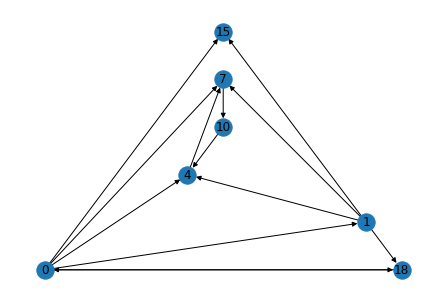

In [11]:
# Ordina le attività in modo da rispettare tutte le precedenze, se ritieni che non sia possibile cerca di
#minimizzare il numero di precedenze non rispettate.
# Le attività sono rappresentate dai numeri compresi da 0 a n-1

lista_da_sinistra_a_destra = [4, 7, 2, 0, 11, 5, 19, 18, 6, 17, 14, 16, 3, 1, 9, 13, 8, 12 ,15 ,10]


print(visualizza_e_valuta_le_precedenze_non_rispettate(lista_da_sinistra_a_destra))
visualizza(prec_original_instance)

In [16]:
# Riesci a fornire una sequenza ciclica S di attività tale che se a precede immediatemente b in S allora [a,b] è una precedenza richiesta.
# Nota: per sequenza ciclica intendiamo che, dove s e t siano il primo e l'ultimo elemento nella sequenza allora si possa dire che t precede immediatemente s. 

ciclo  = [4, 7, 2, 0, 11, 5, 19, 18, 6, 17, 14, 16, 3, 1, 9, 13, 8, 12 ,15 ,10]            
            
print(ciclo_di_precedenze(ciclo))

attenzione, non hai fornito una lista ciclica
